<a href="https://colab.research.google.com/github/Pavan7248/EDA/blob/main/Birdstrike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project on Data Visualization of Bird Strikes between 2000 – 2011**.

In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.metrics import mean_squared_error
from pandas import concat

pd.set_option('display.max_columns', 50)


In [45]:
bird_strikes = pd.read_csv('/content/Bird Strikes data.xlsx - Bird Strikes.csv')

In [46]:
bird_strikes.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Conditions: Precipitation,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,2,US AIRWAYS*,New York,Climb,NaN,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,NaN,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,2,BUSINESS,Louisiana,Approach,NaN,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,2,ALASKA AIRLINES,Washington,Climb,NaN,True,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,2,COMAIR AIRLINES,Virginia,Approach,NaN,False,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [47]:
bird_strikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [48]:
#Convert variable types and creating additional date variables
bird_strikes['FlightDate'] = bird_strikes['FlightDate'].astype(str)
bird_strikes['FlightDate']=pd.to_datetime(bird_strikes['FlightDate'].str[:-5], errors='coerce')
bird_strikes['Year']=bird_strikes['FlightDate'].dt.year
bird_strikes['Month']=bird_strikes['FlightDate'].dt.month
bird_strikes['Month and Year']=bird_strikes['FlightDate'].dt.strftime('%b %Y')

def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Fall'
    else:
        return 'Winter'

bird_strikes['Season']=bird_strikes['Month'].apply(get_season)

<ipython-input-48-465c6afccc28>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bird_strikes['FlightDate']=pd.to_datetime(bird_strikes['FlightDate'].str[:-5], errors='coerce')


In [49]:
bird_strikes.describe()

,Record ID,Wildlife: Number Struck Actual,FlightDate,Number of people injured,Year,Month
count,25558.000000,25558.000000,25429,25558.000000,25429.000000,25429.000000
mean,253916.085609,2.691525,2007-01-22 13:20:40.017303040,0.001056,2006.502772,7.210193
min,1195.000000,1.000000,2000-01-02 00:00:00,0.000000,2000.000000,1.000000
25%,225783.750000,1.000000,2004-06-17 00:00:00,0.000000,2004.000000,5.000000
50%,248749.000000,1.000000,2007-07-29 00:00:00,0.000000,2007.000000,8.000000
75%,269168.750000,1.000000,2009-11-01 00:00:00,0.000000,2009.000000,9.000000
max,321909.000000,942.000000,2011-12-31 00:00:00,6.000000,2011.000000,12.000000
std,38510.453382,12.793975,NaN,0.050420,3.362241,2.793630


In [50]:
#Count how many bird strikes happened per year
strikes_per_year=Counter(bird_strikes['Year'])
years=list(strikes_per_year.keys())
strikes_years = list(strikes_per_year.values())

#Count how many bird strikes happened per Season
strikes_per_season=Counter(bird_strikes['Season'])
seasons=list(strikes_per_season.keys())
strikes_seasons=list(strikes_per_season.values())

#Count how many bird strikes happened per Month
strikes_per_tod = Counter(bird_strikes['Month'])
tod=list(strikes_per_tod.keys())
strikes_tod=list(strikes_per_tod.values())

#Count how many bird strikes included a warning for the pilot
strikes_per_damage = Counter(bird_strikes['Effect: Indicated Damage'])
damages= list(strikes_per_damage.keys())
strikes_damage=list(strikes_per_damage.values())

#Count how many bird strikes occured with each wildlife size
strikes_per_size =Counter(bird_strikes['Wildlife: Size'])
size= list(strikes_per_size.keys())
strikes_size=list(strikes_per_size.values())

strikes_per_phase = Counter(bird_strikes['When: Phase of flight'])
phase= list(strikes_per_phase.keys())
strikes_phase=list(strikes_per_phase.values())

In [51]:
bird_strikes.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year', 'Month', 'Month and Year', 'Season'],
      dtype='object')

In [52]:
bird_strikes.shape

(25558, 30)

[Text(0, 0.5, 'Strikes'),
 Text(0.5, 0, 'Phase of Flight'),
 Text(0.5, 1.0, 'Strikes per Phase of Flight')]

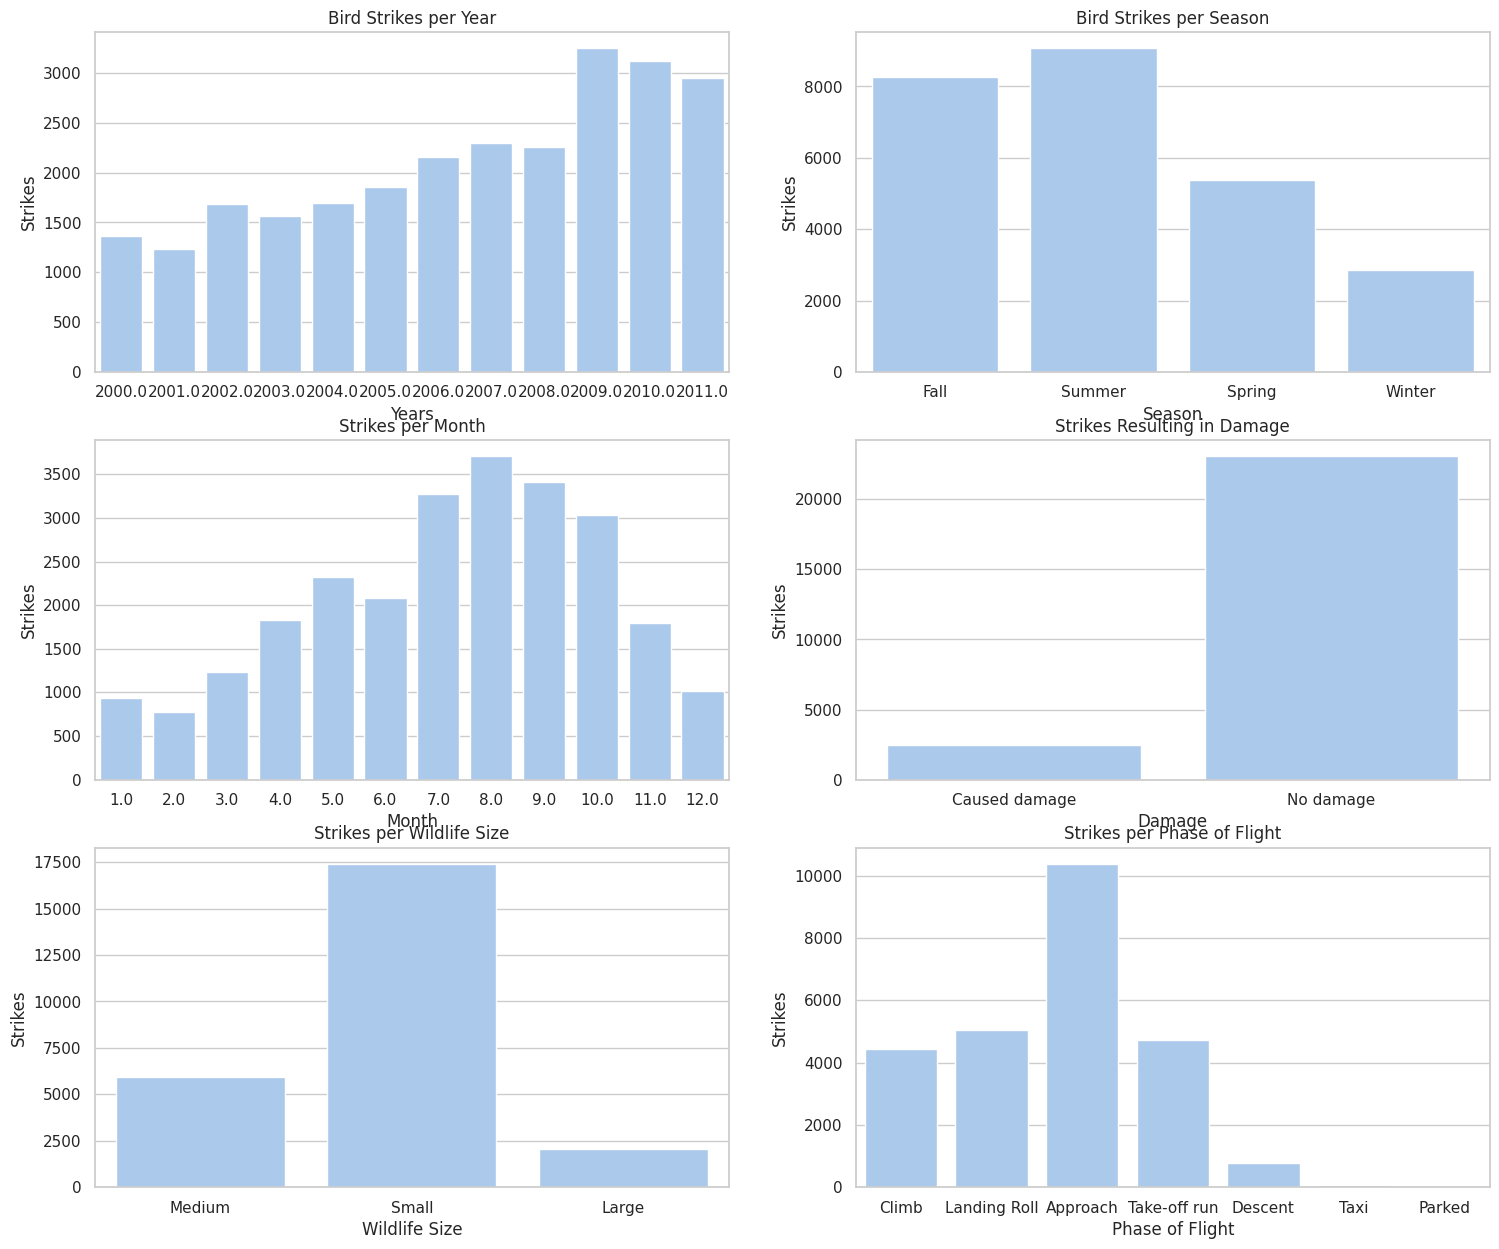

In [53]:
fig=plt.figure(figsize=(18,15))
ax1= fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
#Add seaborn styles to plots
sns.set(style='whitegrid')
sns.set_color_codes('pastel')

sns.barplot(x=years, y=strikes_years, color='b', ax=ax1)
ax1.set(ylabel='Strikes', xlabel='Years', title='Bird Strikes per Year')

sns.barplot(x=seasons, y=strikes_seasons, color='b', ax=ax2)
ax2.set(ylabel='Strikes', xlabel='Season', title='Bird Strikes per Season')

sns.barplot(x=tod, y=strikes_tod, color='b', ax=ax3)
ax3.set(ylabel='Strikes', xlabel='Month', title='Strikes per Month')

sns.barplot(x=damages, y=strikes_damage, color='b', ax=ax4)
ax4.set(ylabel='Strikes', xlabel='Damage', title='Strikes Resulting in Damage')

sns.barplot(x=size, y=strikes_size, color='b', ax=ax5)
ax5.set(ylabel='Strikes', xlabel='Wildlife Size', title='Strikes per Wildlife Size')

sns.barplot(x=phase, y=strikes_phase, color='b', ax=ax6)
ax6.set(ylabel='Strikes', xlabel='Phase of Flight', title='Strikes per Phase of Flight')

In [54]:
strikes_per_impact=Counter(bird_strikes['Effect: Impact to flight'])
impacts=list(strikes_per_impact.keys())
impact_strikes=list(strikes_per_impact.values())

strikes_per_damage=Counter(bird_strikes['Effect: Indicated Damage'])
damages=list(strikes_per_damage.keys())
damage_strikes=list(strikes_per_damage.values())

[Text(0, 0.5, 'Strikes'),
 Text(0.5, 0, 'Damage'),
 Text(0.5, 1.0, 'Strikes per Damage')]

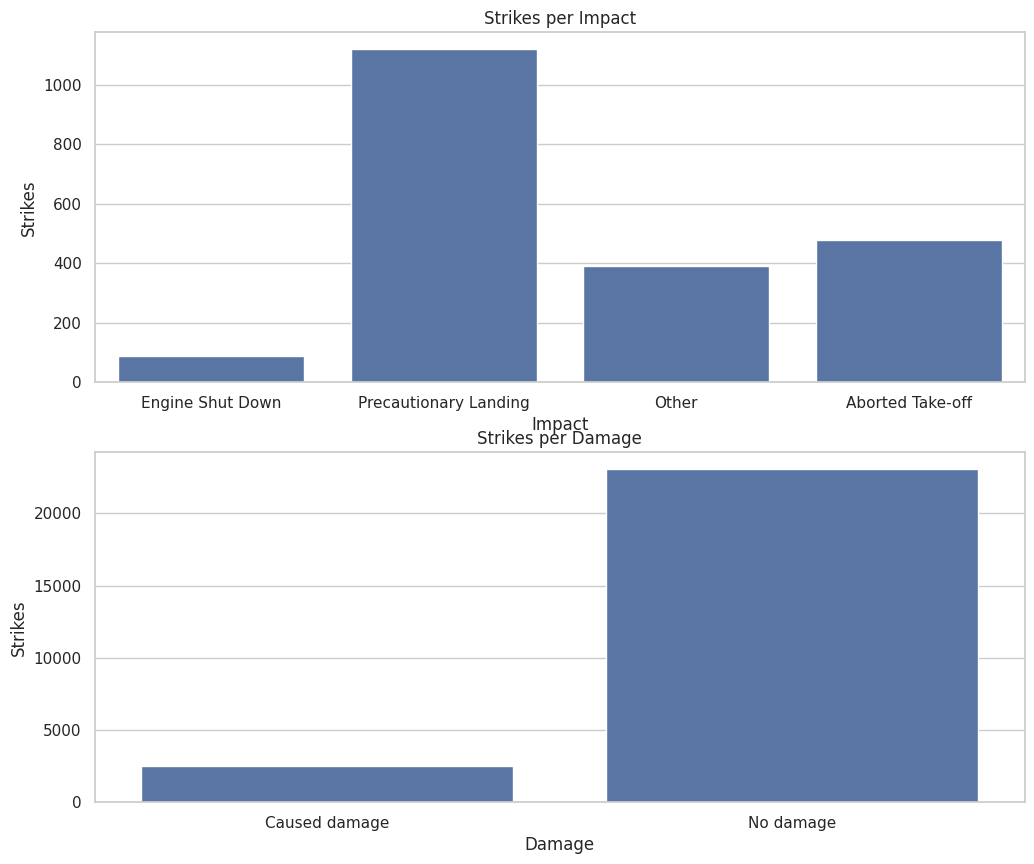

In [55]:
fig=plt.figure(figsize=(12,10))

ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

#lt.tight_layout()

sns.barplot(x=impacts, y=impact_strikes, ax=ax1)
ax1.set(ylabel='Strikes', xlabel='Impact', title='Strikes per Impact')

sns.barplot(x=damages, y=damage_strikes, ax=ax2)
ax2.set(ylabel='Strikes', xlabel='Damage', title="Strikes per Damage")

[Text(0.5, 76.24999999999999, 'Year'),
 Text(0.5, 1.0, 'Top 10 Airports with the Greatest Yearly Averge Strikes')]

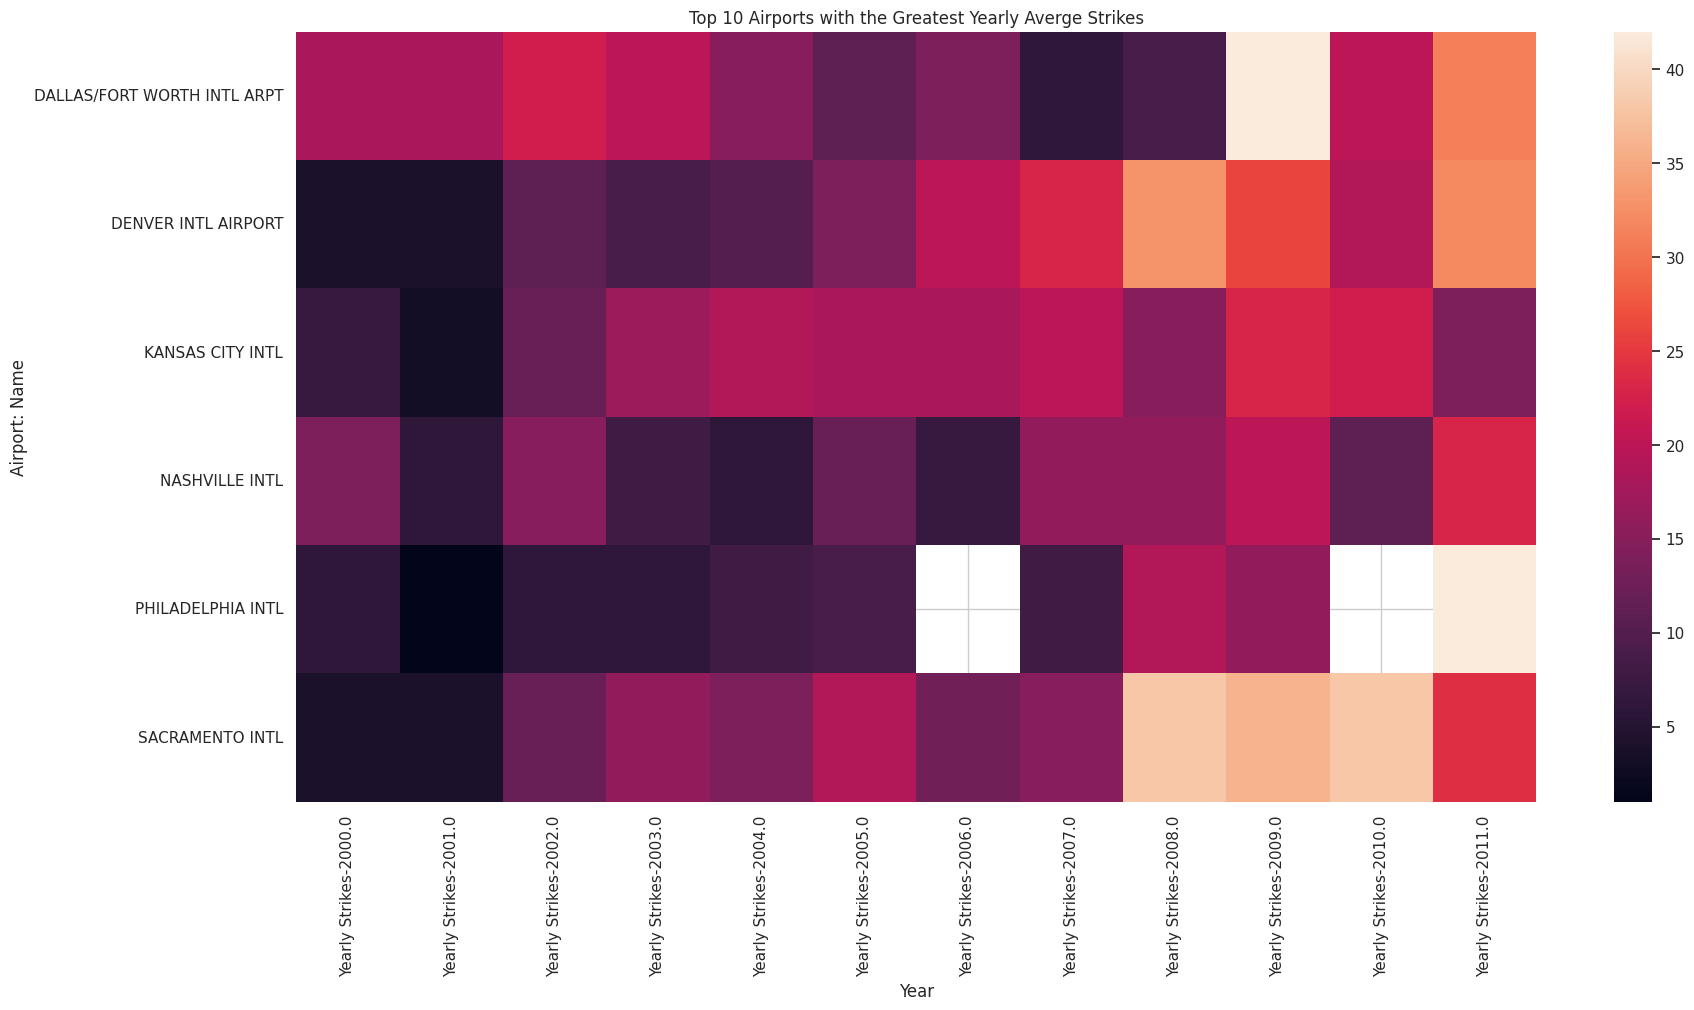

In [56]:
airport_yr_tot=bird_strikes.loc[bird_strikes['When: Phase of flight'].isin(['Climb', 'Take-off run', 'Parked', 'Taxi'])].groupby(
    ['Year', 'Airport: Name']).size().to_frame('Yearly Strikes')
airport_yr_tot.reset_index(level=[0,1], inplace=True)

airport_yr_avg=airport_yr_tot.groupby(['Airport: Name'])['Yearly Strikes'].mean().to_frame('Yearly Avg')
airport_yr_avg.reset_index(level=0, inplace=True)

airport_total=bird_strikes.loc[bird_strikes['When: Phase of flight'].isin(['Climb', 'Take-off run', 'Parked', 'Taxi'])].groupby(
    ['Airport: Name']).size().to_frame('Total Strikes')
airport_total.reset_index(inplace=True)

airport=pd.merge(airport_yr_tot, airport_total, on='Airport: Name')
airport=pd.merge(airport, airport_yr_avg, on= 'Airport: Name')
airport=airport.sort_values('Yearly Avg', ascending=False).head(70)

fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(111)

sns.heatmap(airport.pivot_table(index='Airport: Name', columns='Year', values=['Yearly Strikes']), ax=ax1)
ax1.set(xlabel='Year', title='Top 10 Airports with the Greatest Yearly Averge Strikes')

[Text(0.5, 0, 'Total Strikes'),
 Text(0.5, 1.0, 'Total Strikes by Airline/Operator')]

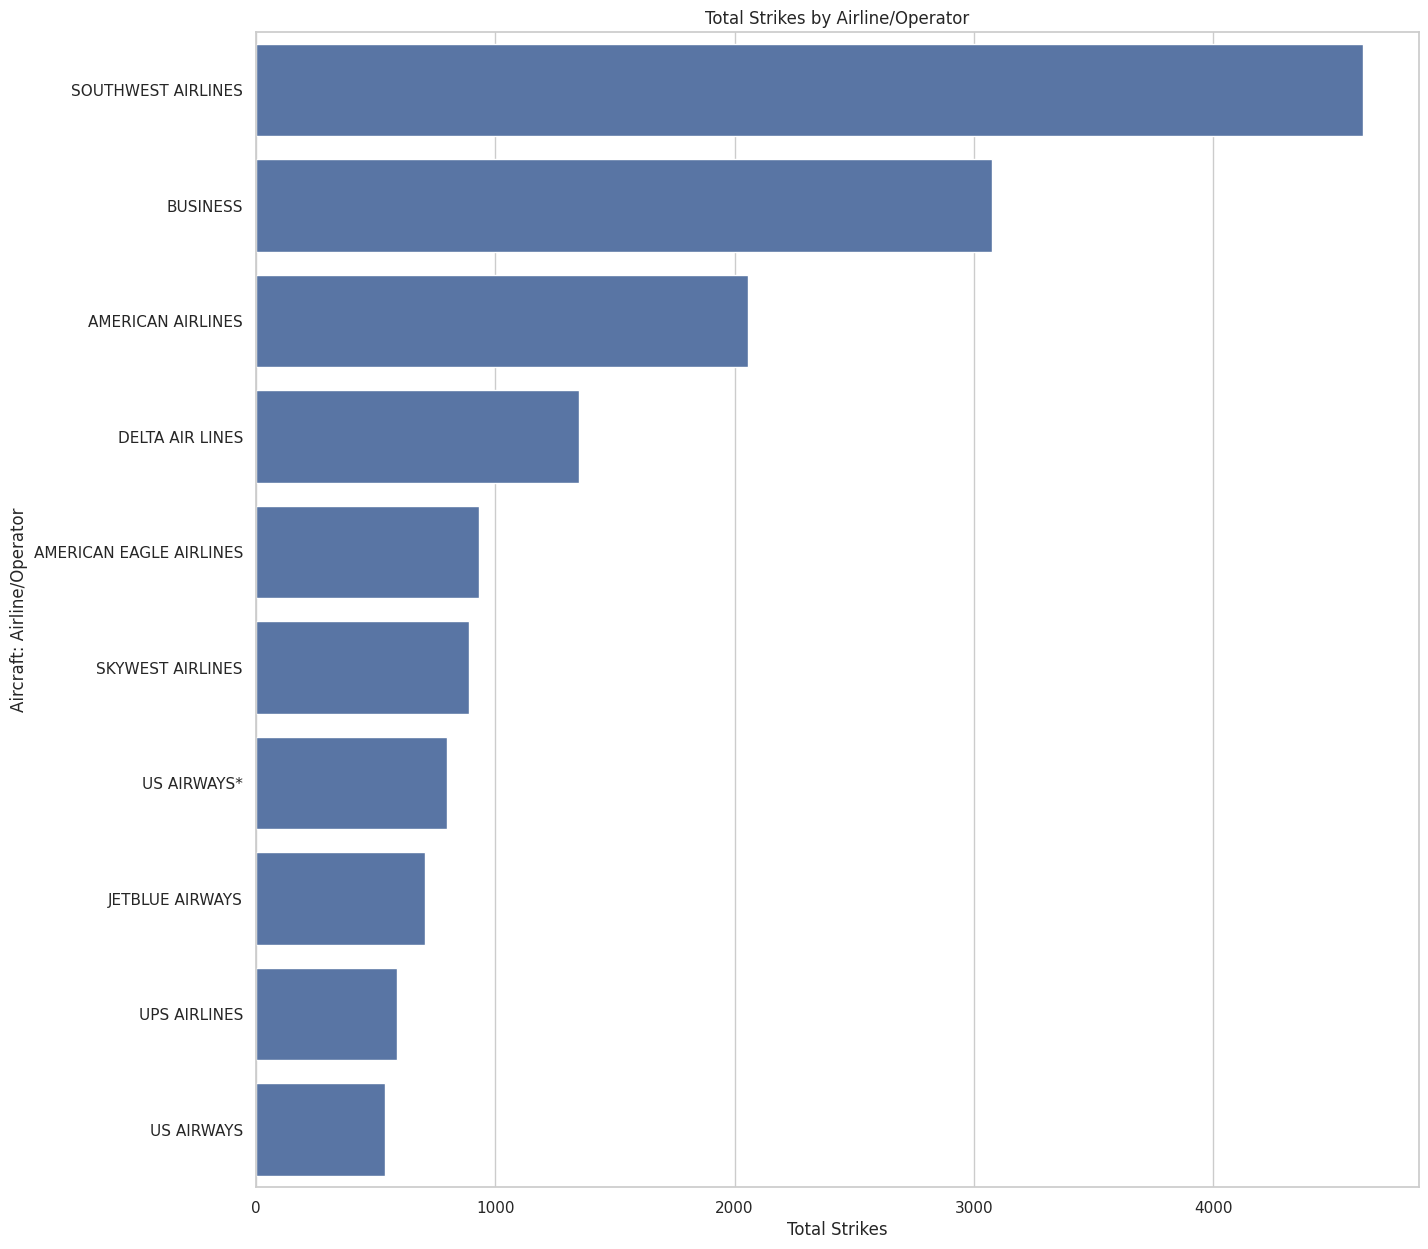

In [57]:
airline_strikes=bird_strikes.groupby(['Aircraft: Airline/Operator']).size().to_frame('Total Strikes')
airline_strikes.reset_index(level=0, inplace=True)

fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(111)
airline_strikes.sort_values(['Total Strikes'], inplace=True, ascending=False)
airline_strikes=airline_strikes.loc[airline_strikes['Aircraft: Airline/Operator'] != 'UNKNOWN'].head(10)
sns.barplot(x='Total Strikes', y='Aircraft: Airline/Operator', data=airline_strikes, ax=ax1)
ax1.set(xlabel='Total Strikes', title='Total Strikes by Airline/Operator')

<Axes: xlabel='Month and Year', ylabel='Total Strikes'>

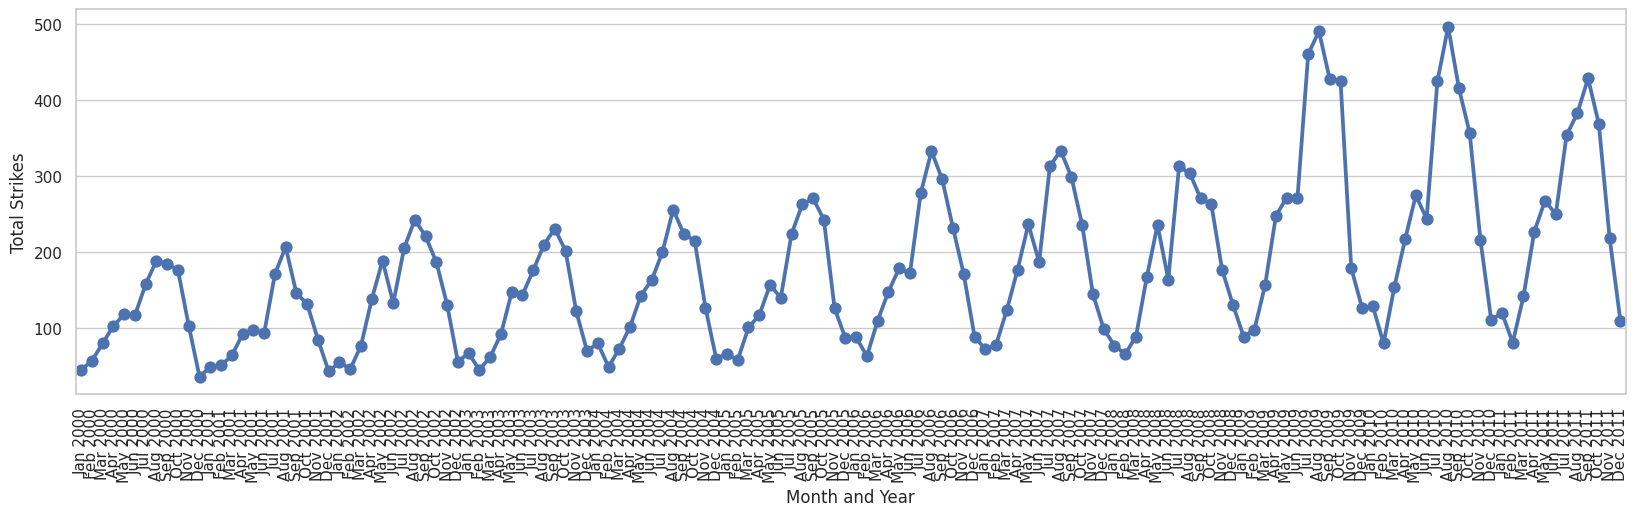

In [58]:
strikes_per_moyr=bird_strikes.groupby(['Month and Year', 'Year', 'Month']).size().to_frame('Total Strikes')
strikes_per_moyr.reset_index(level=[0,1,2], inplace=True)
strikes_per_moyr.sort_values(['Year', 'Month'], inplace=True)
fig=plt.figure(figsize=(20,5))
ax1=fig.add_subplot(111)
plt.xticks(rotation=90)
sns.pointplot(x='Month and Year', y='Total Strikes', data=strikes_per_moyr, ax=ax1)

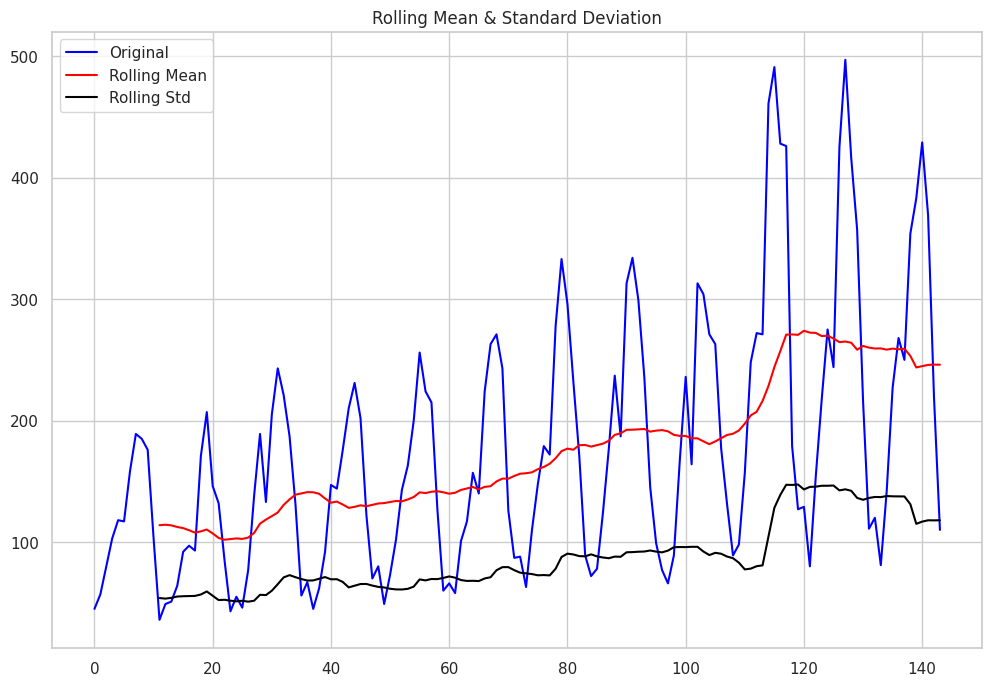

Results of Dickey-Fuller Test:
(144,)
Test Statistic                  -1.041282
p-value                          0.737912
#Lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [59]:
strikes_per_moyr=strikes_per_moyr[['Month and Year', 'Total Strikes']]
strikes_per_moyr.reset_index(inplace=True)
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    print(timeseries.shape)
    dftest = adfuller(timeseries.values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(strikes_per_moyr['Total Strikes'])